<a href="https://colab.research.google.com/github/aymnblh/Sports-Data-Analyse/blob/main/Pythagorean_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# English Premier League (EPL) Pythagorean Predictor

## Step 1

In [ ]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data. 
# EPL results for the 2017/18 season

EPL18 = pd.read_excel('Assignment Data/Week 1/EPL2017-18.xlsx')
print(EPL18.columns.tolist())
EPL18.head()

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,20170811,Arsenal,Leicester,4,3,H
1,20170812,Brighton,Man City,0,2,A
2,20170812,Chelsea,Burnley,2,3,A
3,20170812,Crystal Palace,Huddersfield,0,3,A
4,20170812,Everton,Stoke,1,0,H


## Step 2

In [ ]:
EPL18['hwinvalue']=np.where(EPL18['FTR']=='H',1,np.where(EPL18['FTR']=='D',.5,0))
EPL18['awinvalue']=np.where(EPL18['FTR']=='A',1,np.where(EPL18['FTR']=='D',.5,0))
EPL18['count']=1

## Step 3

In [ ]:
Half1 = EPL18[EPL18.Date < 20180000]

In [ ]:
Half2 = EPL18[EPL18.Date > 20180000]
Half2.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,hwinvalue,awinvalue,count
209,20180101,Brighton,Bournemouth,2,2,D,0.5,0.5,1
210,20180101,Burnley,Liverpool,1,2,A,0.0,1.0,1
211,20180101,Everton,Man United,0,2,A,0.0,1.0,1
212,20180101,Leicester,Huddersfield,3,0,H,1.0,0.0,1
213,20180101,Stoke,Newcastle,0,1,A,0.0,1.0,1


In [ ]:
Half1.describe()

,Date,FTHG,FTAG,hwinvalue,awinvalue,count
count,2.090000e+02,209.000000,209.000000,209.000000,209.000000,209.0
mean,2.017106e+07,1.473684,1.181818,0.574163,0.425837,1.0
std,1.451426e+02,1.362452,1.273039,0.422336,0.422336,0.0
min,2.017081e+07,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.017092e+07,0.000000,0.000000,0.000000,0.000000,1.0
50%,2.017110e+07,1.000000,1.000000,0.500000,0.500000,1.0
75%,2.017121e+07,2.000000,2.000000,1.000000,1.000000,1.0
max,2.017123e+07,7.000000,6.000000,1.000000,1.000000,1.0


In [ ]:
half1home = Half1.groupby(['HomeTeam'])['count','hwinvalue', 'FTHG','FTAG'].sum().reset_index()
half1home = half1home.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
half1home

,team,Ph,hwinvalue,FTHGh,FTAGh
0,Arsenal,10,8.5,25,10
1,Bournemouth,11,4.5,14,17
2,Brighton,10,5.5,10,12
3,Burnley,10,6.0,7,6
4,Chelsea,11,8.5,21,7
5,Crystal Palace,11,5.0,14,18
6,Everton,10,6.5,17,13
7,Huddersfield,11,6.0,10,12
8,Leicester,10,5.0,13,14
9,Liverpool,11,8.5,21,4


In [ ]:
Half2.describe()

,Date,FTHG,FTAG,hwinvalue,awinvalue,count
count,1.710000e+02,171.000000,171.000000,171.000000,171.000000,171.0
mean,2.018030e+07,1.602339,1.105263,0.599415,0.400585,1.0
std,1.400601e+02,1.312741,1.051904,0.422248,0.422248,0.0
min,2.018010e+07,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.018020e+07,1.000000,0.000000,0.000000,0.000000,1.0
50%,2.018031e+07,1.000000,1.000000,0.500000,0.500000,1.0
75%,2.018042e+07,2.000000,2.000000,1.000000,1.000000,1.0
max,2.018051e+07,5.000000,4.000000,1.000000,1.000000,1.0


In [ ]:
half1away = Half1.groupby('AwayTeam')['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()
half1away = half1away.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
half1away

,team,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,11,5.0,16,13
1,Bournemouth,10,3.0,15,6
2,Brighton,11,3.0,13,5
3,Burnley,11,6.5,11,11
4,Chelsea,10,7.0,7,18
5,Crystal Palace,10,2.5,14,4
6,Everton,11,3.5,19,8
7,Huddersfield,10,3.0,20,8
8,Leicester,11,5.0,18,18
9,Liverpool,10,6.5,20,27


## Step 4 (home team)

In [ ]:
Eng17 = pd.merge(half1home, half1away, on = ['team'])
Eng17

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,10,8.5,25,10,11,5.0,16,13
1,Bournemouth,11,4.5,14,17,10,3.0,15,6
2,Brighton,10,5.5,10,12,11,3.0,13,5
3,Burnley,10,6.0,7,6,11,6.5,11,11
4,Chelsea,11,8.5,21,7,10,7.0,7,18
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4
6,Everton,10,6.5,17,13,11,3.5,19,8
7,Huddersfield,11,6.0,10,12,10,3.0,20,8
8,Leicester,10,5.0,13,14,11,5.0,18,18
9,Liverpool,11,8.5,21,4,10,6.5,20,27


## Step 5 (home team)

In [ ]:
Eng17['W'] = Eng17['hwinvalue']+Eng17['awinvalue']
Eng17['G'] = Eng17['Ph']+Eng17['Pa']
Eng17['GF'] = Eng17['FTHGh']+Eng17['FTAGa']
Eng17['GA'] = Eng17['FTAGh']+Eng17['FTHGa']
Eng17

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,20,32
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,15,25
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,18,17
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,39,14
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,21,18,32
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,21,25,32
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,21,18,32
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,21,31,32
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,21,48,24


In [ ]:
Eng17['wpc'] = Eng17['W']/Eng17['G']
Eng17['pyth'] = Eng17['GF']**2/(Eng17['GF']**2 + Eng17['GA']**2)
Eng17

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA,wpc,pyth
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26,0.642857,0.681132
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,20,32,0.357143,0.280899
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,15,25,0.404762,0.264706
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,18,17,0.595238,0.528548
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,39,14,0.738095,0.885847
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,21,18,32,0.357143,0.240356
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,21,25,32,0.476190,0.379018
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,21,18,32,0.428571,0.240356
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,21,31,32,0.476190,0.484131
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,21,48,24,0.714286,0.800000


## Step 6 (home team)

In [ ]:
half2home = Half2.groupby(['HomeTeam'])['count','hwinvalue', 'FTHG','FTAG'].sum().reset_index()
half2home = half2home.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
half2home

,team,Ph,hwinvalue,FTHGh,FTAGh
0,Arsenal,9,7.5,29,10
1,Bournemouth,8,5.0,12,13
2,Brighton,9,5.5,14,13
3,Burnley,9,3.5,9,11
4,Chelsea,8,4.5,9,9
5,Crystal Palace,8,4.5,15,9
6,Everton,9,5.5,11,9
7,Huddersfield,8,2.5,6,13
8,Leicester,9,5.0,12,8
9,Liverpool,8,7.0,24,6


In [ ]:
half2away = Half2.groupby('AwayTeam')['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()
half2away = half2away.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
half2away

,team,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,8,1.0,15,7
1,Bournemouth,9,4.0,16,13
2,Brighton,8,1.5,16,5
3,Burnley,8,4.0,11,9
4,Chelsea,9,4.5,15,14
5,Crystal Palace,9,4.5,14,12
6,Everton,8,2.5,17,8
7,Huddersfield,9,2.5,13,4
8,Leicester,8,2.5,20,13
9,Liverpool,9,5.0,8,12


## Optional steps, not required for Assessment 
### (Uncomment to run)

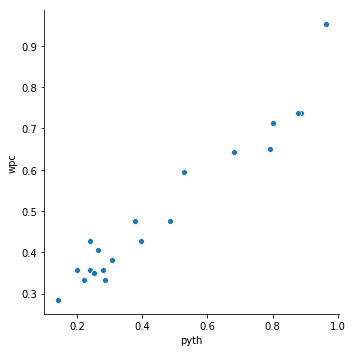

In [ ]:
sns.relplot(x="pyth", y="wpc", data =Eng17)

In [ ]:
pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=Eng17).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     269.6
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           2.81e-12
Time:                        17:15:26   Log-Likelihood:                 33.822
No. Observations:                  20   AIC:                            -63.64
Df Residuals:                      18   BIC:                            -61.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1978      0.021      9.335      0.000       0.153       0.242
pyth           0.6551      0.040     16.420      0.000       0.571       0.739
==============================================================================
Omnibus:                        6.775   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                4.322
Skew:                           1.048   Prob(JB):                        0.115
Kurtosis:                       3.891   Cond. No.                         4.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 7 (=Step 4 (away team))

In [ ]:
Eng18 = pd.merge(half2home, half2away, on = ['team'])
Eng18

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,9,7.5,29,10,8,1.0,15,7
1,Bournemouth,8,5.0,12,13,9,4.0,16,13
2,Brighton,9,5.5,14,13,8,1.5,16,5
3,Burnley,9,3.5,9,11,8,4.0,11,9
4,Chelsea,8,4.5,9,9,9,4.5,15,14
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12
6,Everton,9,5.5,11,9,8,2.5,17,8
7,Huddersfield,8,2.5,6,13,9,2.5,13,4
8,Leicester,9,5.0,12,8,8,2.5,20,13
9,Liverpool,8,7.0,24,6,9,5.0,8,12


## Step 7 (=Step 5 (away team))

In [ ]:
Eng18['W'] = Eng18['hwinvalue']+Eng18['awinvalue']
Eng18['G'] = Eng18['Ph']+Eng18['Pa']
Eng18['GF'] = Eng18['FTHGh']+Eng18['FTAGa']
Eng18['GA'] = Eng18['FTAGh']+Eng18['FTHGa']
Eng18

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA
0,Arsenal,9,7.5,29,10,8,1.0,15,7,8.5,17,36,25
1,Bournemouth,8,5.0,12,13,9,4.0,16,13,9.0,17,25,29
2,Brighton,9,5.5,14,13,8,1.5,16,5,7.0,17,19,29
3,Burnley,9,3.5,9,11,8,4.0,11,9,7.5,17,18,22
4,Chelsea,8,4.5,9,9,9,4.5,15,14,9.0,17,23,24
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12,9.0,17,27,23
6,Everton,9,5.5,11,9,8,2.5,17,8,8.0,17,19,26
7,Huddersfield,8,2.5,6,13,9,2.5,13,4,5.0,17,10,26
8,Leicester,9,5.0,12,8,8,2.5,20,13,7.5,17,25,28
9,Liverpool,8,7.0,24,6,9,5.0,8,12,12.0,17,36,14


## Step 7 (=Step 6 (away team))

In [ ]:
Eng18['wpc2'] = Eng18['W']/Eng18['G']
Eng18['pyth2'] = Eng18['GF']**2/(Eng18['GF']**2 + Eng18['GA']**2)
Eng18

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA,wpc2,pyth2
0,Arsenal,9,7.5,29,10,8,1.0,15,7,8.5,17,36,25,0.500000,0.674649
1,Bournemouth,8,5.0,12,13,9,4.0,16,13,9.0,17,25,29,0.529412,0.426330
2,Brighton,9,5.5,14,13,8,1.5,16,5,7.0,17,19,29,0.411765,0.300333
3,Burnley,9,3.5,9,11,8,4.0,11,9,7.5,17,18,22,0.441176,0.400990
4,Chelsea,8,4.5,9,9,9,4.5,15,14,9.0,17,23,24,0.529412,0.478733
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12,9.0,17,27,23,0.529412,0.579491
6,Everton,9,5.5,11,9,8,2.5,17,8,8.0,17,19,26,0.470588,0.348120
7,Huddersfield,8,2.5,6,13,9,2.5,13,4,5.0,17,10,26,0.294118,0.128866
8,Leicester,9,5.0,12,8,8,2.5,20,13,7.5,17,25,28,0.441176,0.443577
9,Liverpool,8,7.0,24,6,9,5.0,8,12,12.0,17,36,14,0.705882,0.868633


## Optional steps, not required for Assessment
### (Uncomment to run)

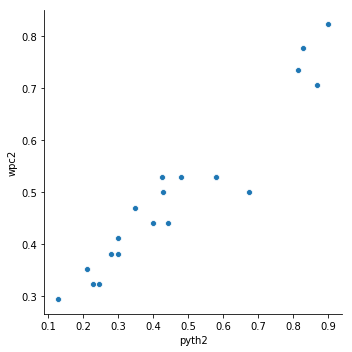

In [ ]:
# Plot the data
sns.relplot(x="pyth2", y="wpc2", data =Eng18)

In [ ]:
# Run the regression
pyth_lm = smf.ols(formula = 'wpc2 ~ pyth2', data=Eng18).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wpc2   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           5.02e-11
Time:                        17:14:29   Log-Likelihood:                 34.030
No. Observations:                  20   AIC:                            -64.06
Df Residuals:                      18   BIC:                            -62.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2040      0.024      8.586      0.000       0.154       0.254
pyth2          0.6237      0.045     13.823      0.000       0.529       0.718
==============================================================================
Omnibus:                        5.199   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.933
Skew:                          -0.826   Prob(JB):                        0.231
Kurtosis:                       3.890   Cond. No.                         5.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 8

In [ ]:
Eng = pd.merge(Eng17, Eng18, on = ['team'])
Eng18

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA,wpc2,pyth2
0,Arsenal,9,7.5,29,10,8,1.0,15,7,8.5,17,36,25,0.500000,0.674649
1,Bournemouth,8,5.0,12,13,9,4.0,16,13,9.0,17,25,29,0.529412,0.426330
2,Brighton,9,5.5,14,13,8,1.5,16,5,7.0,17,19,29,0.411765,0.300333
3,Burnley,9,3.5,9,11,8,4.0,11,9,7.5,17,18,22,0.441176,0.400990
4,Chelsea,8,4.5,9,9,9,4.5,15,14,9.0,17,23,24,0.529412,0.478733
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12,9.0,17,27,23,0.529412,0.579491
6,Everton,9,5.5,11,9,8,2.5,17,8,8.0,17,19,26,0.470588,0.348120
7,Huddersfield,8,2.5,6,13,9,2.5,13,4,5.0,17,10,26,0.294118,0.128866
8,Leicester,9,5.0,12,8,8,2.5,20,13,7.5,17,25,28,0.441176,0.443577
9,Liverpool,8,7.0,24,6,9,5.0,8,12,12.0,17,36,14,0.705882,0.868633


## Step 9

In [ ]:
pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=Eng).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     269.6
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           2.81e-12
Time:                        17:13:10   Log-Likelihood:                 33.822
No. Observations:                  20   AIC:                            -63.64
Df Residuals:                      18   BIC:                            -61.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1978      0.021      9.335      0.000       0.153       0.242
pyth           0.6551      0.040     16.420      0.000       0.571       0.739
==============================================================================
Omnibus:                        6.775   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                4.322
Skew:                           1.048   Prob(JB):                        0.115
Kurtosis:                       3.891   Cond. No.                         4.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Optional steps, not required for Assessment
### (Uncomment to run)

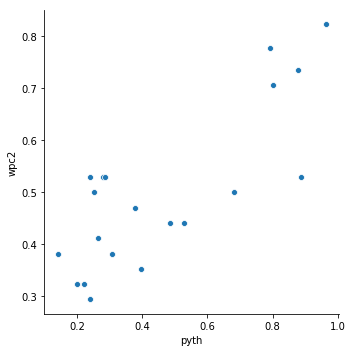

In [ ]:
sns.relplot(x="pyth", y="wpc2", data =Eng)

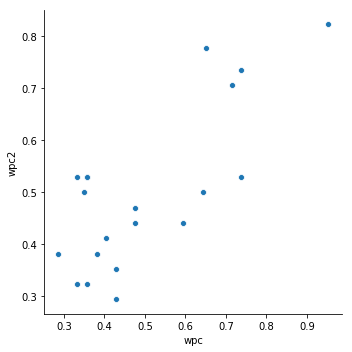

In [ ]:
sns.relplot(x="wpc", y="wpc2", data =Eng)

In [ ]:
pyth_lm = smf.ols(formula = 'pyth ~ wpc2', data=Eng).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pyth   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     31.06
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           2.73e-05
Time:                        17:36:30   Log-Likelihood:                 8.3244
No. Observations:                  20   AIC:                            -12.65
Df Residuals:                      18   BIC:                            -10.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2345      0.130     -1.799      0.089      -0.508       0.039
wpc2           1.3937      0.250      5.573      0.000       0.868       1.919
==============================================================================
Omnibus:                        0.509   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.775   Jarque-Bera (JB):                0.250
Skew:                           0.262   Prob(JB):                        0.882
Kurtosis:                       2.841   Cond. No.                         8.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now you have completed the assignment, are these results consistent with those we found for Major League Baseball?

In [ ]:
keyvars = Eng[['team','wpc2','wpc','pyth','pyth2']]
keyvars.corr()

,wpc2,wpc,pyth,pyth2
wpc2,1.000000,0.756573,0.795693,0.955986
wpc,0.756573,1.000000,0.968204,0.745832
pyth,0.795693,0.968204,1.000000,0.795331
pyth2,0.955986,0.745832,0.795331,1.000000
